# Download and create GeoPandas dataframes for Mexico

This notebook downloads Shapefiles for States (admin1) and Municipalities (admin2) from the 2020 Mexican Census: [INEGI](https://www.inegi.org.mx/temas/mg/).

Data [description](https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=889463807469)

The data are downloaded and saved as Geopandas GeoDataFrames in the [Parquet compressed format](https://geopandas.readthedocs.io/en/latest/docs/reference/api/geopandas.GeoDataFrame.to_parquet.html) in the data directory:

* GeoPandas GeoDataFrame for States in Mexico: data/mexico_admin1.parquet
* GeoPandas GeoDataFrame for Municipalities in Mexico: data/mexico_admin2.parquet

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# ignore warnings when saving parquet files
import warnings
warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')

## Download the data file

In [3]:
# Linux
# !wget https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marcogeo/889463807469/889463807469_s.zip -p ../data

In [4]:
# macOS
# !curl -o ../data/889463807469_s.zip https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marcogeo/889463807469/889463807469_s.zip 

## Extract the main data file with integrated information about Mexico

In [5]:
!unzip ../data/889463807469_s.zip 'MG_2020_Integrado.zip' -d ../data

Archive:  ../data/889463807469_s.zip
 extracting: ../data/MG_2020_Integrado.zip  


## Extract Shape File for States, convert to Geopandas and save dataframe

In [6]:
!unzip ../data/MG_2020_Integrado.zip 'conjunto_de_datos/00ent*' -d ../data

Archive:  ../data/MG_2020_Integrado.zip
 extracting: ../data/conjunto_de_datos/00ent.cpg  
  inflating: ../data/conjunto_de_datos/00ent.dbf  
  inflating: ../data/conjunto_de_datos/00ent.prj  
  inflating: ../data/conjunto_de_datos/00ent.shp  
  inflating: ../data/conjunto_de_datos/00ent.shx  


In [7]:
admin1 = gpd.read_file('../data/conjunto_de_datos/00ent.shp')

In [8]:
admin1.head()

CVEGEO CVE_ENT                NOMGEO  \
0     01      01        Aguascalientes   
1     02      02       Baja California   
2     03      03   Baja California Sur   
3     04      04              Campeche   
4     05      05  Coahuila de Zaragoza   

                                            geometry  
0  POLYGON ((2470517.824 1155028.588, 2470552.248...  
1  MULTIPOLYGON (((1493197.166 1849625.247, 14934...  
2  MULTIPOLYGON (((1694656.344 1227647.637, 16946...  
3  MULTIPOLYGON (((3544897.199 946994.621, 354491...  
4  POLYGON ((2469954.193 1978522.993, 2469982.807...

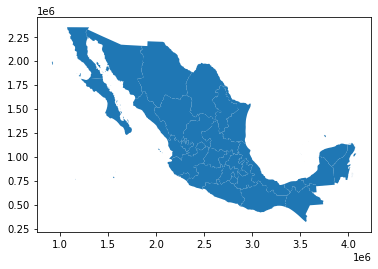

In [9]:
admin1.plot();

Save dataframe as a .parquet file with broli compression

In [10]:
admin1.to_parquet('../data/mexico_admin1.parquet', compression='brotli')

## Extract Shape File for Municipalities, convert to Geopandas and save dataframe

In [11]:
!unzip ../data/MG_2020_Integrado.zip 'conjunto_de_datos/00mun*' -d ../data

Archive:  ../data/MG_2020_Integrado.zip
 extracting: ../data/conjunto_de_datos/00mun.cpg  
  inflating: ../data/conjunto_de_datos/00mun.dbf  
  inflating: ../data/conjunto_de_datos/00mun.prj  
  inflating: ../data/conjunto_de_datos/00mun.shp  
  inflating: ../data/conjunto_de_datos/00mun.shx  


In [12]:
admin2 = gpd.read_file('../data/conjunto_de_datos/00mun.shp')

In [13]:
admin2.head()

CVEGEO CVE_ENT CVE_MUN          NOMGEO  \
0  01001      01     001  Aguascalientes   
1  01002      01     002        Asientos   
2  01003      01     003        Calvillo   
3  01004      01     004           Cosío   
4  01005      01     005     Jesús María   

                                            geometry  
0  POLYGON ((2489072.503 1115771.584, 2489352.774...  
1  POLYGON ((2494680.261 1141224.505, 2494749.948...  
2  POLYGON ((2429607.454 1120262.254, 2429071.902...  
3  POLYGON ((2470517.824 1155028.588, 2470552.248...  
4  POLYGON ((2465526.729 1114740.466, 2465752.546...

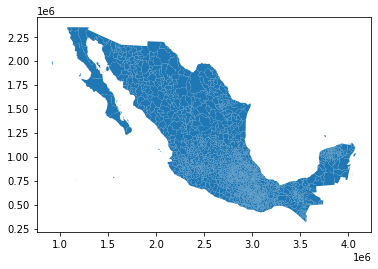

In [14]:
admin2.plot();

In [15]:
admin2.to_parquet('../data/mexico_admin2.parquet', compression='brotli')

#### Clean up - remove intermediate data files

In [16]:
!rm ../data/889463807469_s.zip
!rm ../data/MG_2020_Integrado.zip
!rm -r ../data/conjunto_de_datos